<a href="https://colab.research.google.com/github/seeratfatima19/CODSOFT/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.metrics as sk_metrics

In [77]:
from sklearn.preprocessing import LabelEncoder


In [4]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')


Mounted at /content/drive


In [100]:
train_data = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

In [101]:
train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [102]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [103]:
#drop blank rows

train_data.isnull().sum()
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [104]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

Preprocessing


In [105]:
train_data.drop(['first','last','trans_date_trans_time','dob','trans_num'],axis=1,inplace=True)


In [106]:
test_data.drop(['first','last','trans_date_trans_time','dob','trans_num'],axis=1,inplace=True)

In [107]:
train_data.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [108]:
test_data.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [109]:
data = pd.concat([test_data,train_data])


In [111]:
data = data.sample(frac=1) #shuffle data



In [112]:
# changing categorical data into numerical data


le = LabelEncoder()
merchant = le.fit_transform(data['merchant'])
gender = le.fit_transform(data['gender'])
street = le.fit_transform(data['street'])
city = le.fit_transform(data['city'])
state = le.fit_transform(data['state'])
job = le.fit_transform(data['job'])
category = le.fit_transform(data['category'])

data.drop(['merchant','gender','street','city','state','job','category'],axis=1,inplace=True)

data['merchant']=merchant
data['gender']=gender
data['street']=street
data['city']=city
data['state']=state
data['job']=job
data['category']=category

data.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant,gender,street,city,state,job,category
17257,17257,4044436772018844508,108.23,45415,39.8355,-84.2613,479994,1372336292,40.230340,-83.376872,0,390,0,14,200,35,182,0
276770,276770,3518758680062249,304.52,84532,38.5677,-109.5271,9772,1337235405,39.402262,-109.386308,1,329,1,883,521,44,275,4
108650,108650,6011438889172900,38.33,72042,34.2853,-91.3336,5161,1375035407,35.209857,-92.313824,0,482,0,421,204,2,147,7
328999,328999,3533742182628021,54.14,29455,32.8357,-79.8217,20478,1338943030,32.965414,-78.931243,0,498,1,864,392,40,287,2
393802,393802,38295635583927,85.08,79539,33.3749,-99.8473,178,1340966284,33.149326,-98.921741,0,427,0,942,600,43,489,4


In [113]:
#again splitting data into test and train sets

X  = data.drop(['is_fraud'],1)
Y = data['is_fraud']

#checking is prcess was successful

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)



<ipython-input-113-eaff34e4211b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X  = data.drop(['is_fraud'],1)


(1852394, 17)
(1852394,)


Data distribution graphs

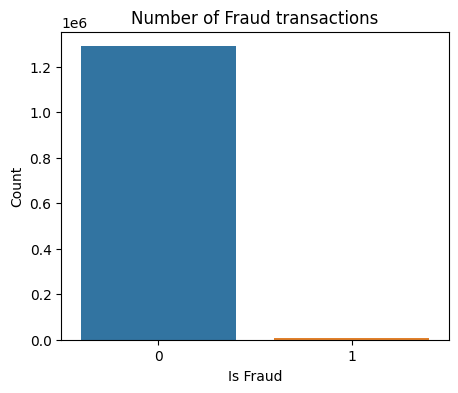

In [123]:
plt.figure(figsize=(5, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Number of Fraud transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

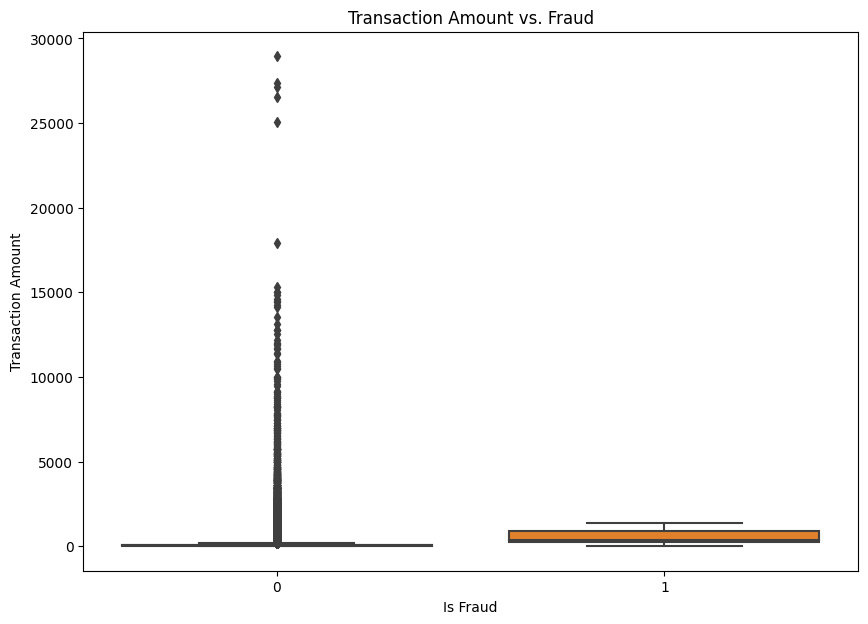

In [125]:
# analyze at what amount fraud was commited

plt.figure(figsize=(10, 7))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-40-7bb8cf928a7a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


<Axes: >

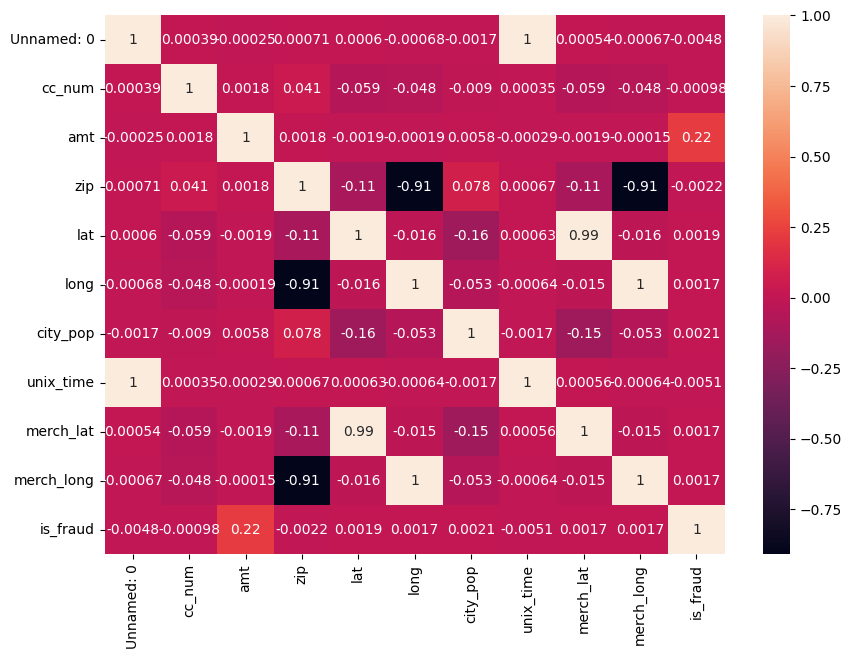

In [40]:
#displaying heatmap

corr_matrix = train_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot=True)

In [42]:
from sklearn.linear_model import LogisticRegression

In [114]:
model = LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
preds= model.predict(x_test)
print(model.score(x_test,y_test))

0.9947932271464779


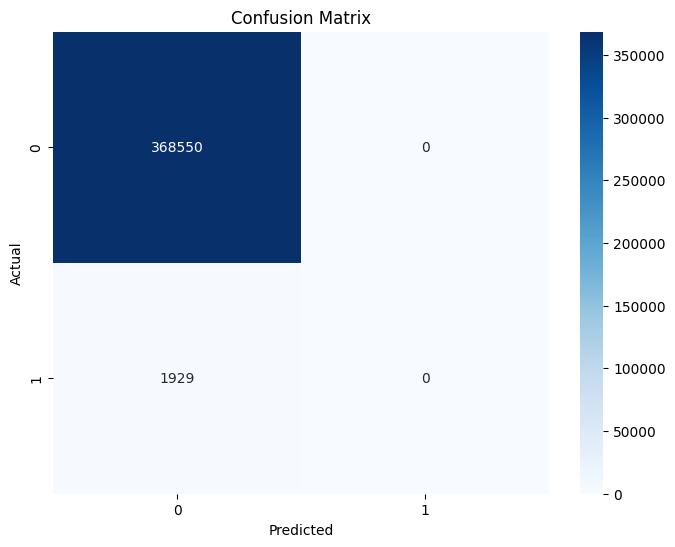

In [121]:
# Calculate and plot confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
